In [1]:
%cd ..

import cv2
import numpy as np
import matplotlib.pyplot as plt

from dataset import VOT14Reader

/Users/santapo/Works/AIVN/AIVN-materials/object_tracking


In [2]:
dataset = VOT14Reader(dataset_path="./vot14")
sample = dataset[14]
polygon = sample[1][0]
frame = sample[0][0]
roi = frame[polygon[1]:polygon[1] + polygon[3],
            polygon[0]:polygon[0] + polygon[2]]

### Backprojection in Numpy

In [3]:
hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

#target is the image we search in
target = sample[0][1]
hsvt = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)

# Find the histograms using calcHist. Can be done with np.histogram2d also
M = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
I = cv2.calcHist([hsvt], [0, 1], None, [180, 256], [0, 180, 0, 256])
R = M / I

/var/folders/zq/4ztf70_s7qldh659t9zjz6th0000gn/T/ipykernel_42256/131294525.py:10: RuntimeWarning: divide by zero encountered in divide
  R = M / I
/var/folders/zq/4ztf70_s7qldh659t9zjz6th0000gn/T/ipykernel_42256/131294525.py:10: RuntimeWarning: invalid value encountered in divide
  R = M / I


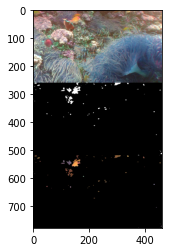

In [64]:
h,s,v = cv2.split(hsvt)

B = R[h.ravel(),s.ravel()]
B = np.minimum(B,1)
B = B.reshape(hsvt.shape[:2])

disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cv2.filter2D(B, -1, disc, B)
B = np.uint8(B)
cv2.normalize(B, B, 0, 255, cv2.NORM_MINMAX)
ret, thresh = cv2.threshold(B, 50, 255, 0)

thresh = cv2.merge((thresh, thresh, thresh))
res = cv2.bitwise_and(target, thresh)
res = np.vstack((target, thresh, res))

plt.imshow(res)


### Backprojection in OpenCV

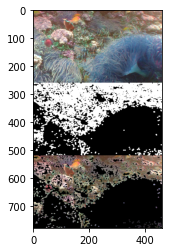

In [4]:
# hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)
# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)
res = np.vstack((target,thresh,res))

plt.imshow(res)
# cv2.imwrite('res.jpg',res)

In [50]:
B

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)